# Hello MNIST MLP Classifier

Simple MNIST digit MLP classifier using scikit-learn

In [2]:
# Prerequisites
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
print("Python Version: ", sys.version)
print("Numpy Version: ", np.__version__)
print("Pandas Version: ", pd.__version__)
np.set_printoptions(precision=3, suppress=True)

Python Version:  3.12.7 (tags/v3.12.7:0b05ead, Oct  1 2024, 03:06:41) [MSC v.1941 64 bit (AMD64)]
Numpy Version:  2.2.2
Pandas Version:  2.2.3


### Load dataset

Training test size: 60000, Test set size: 10000


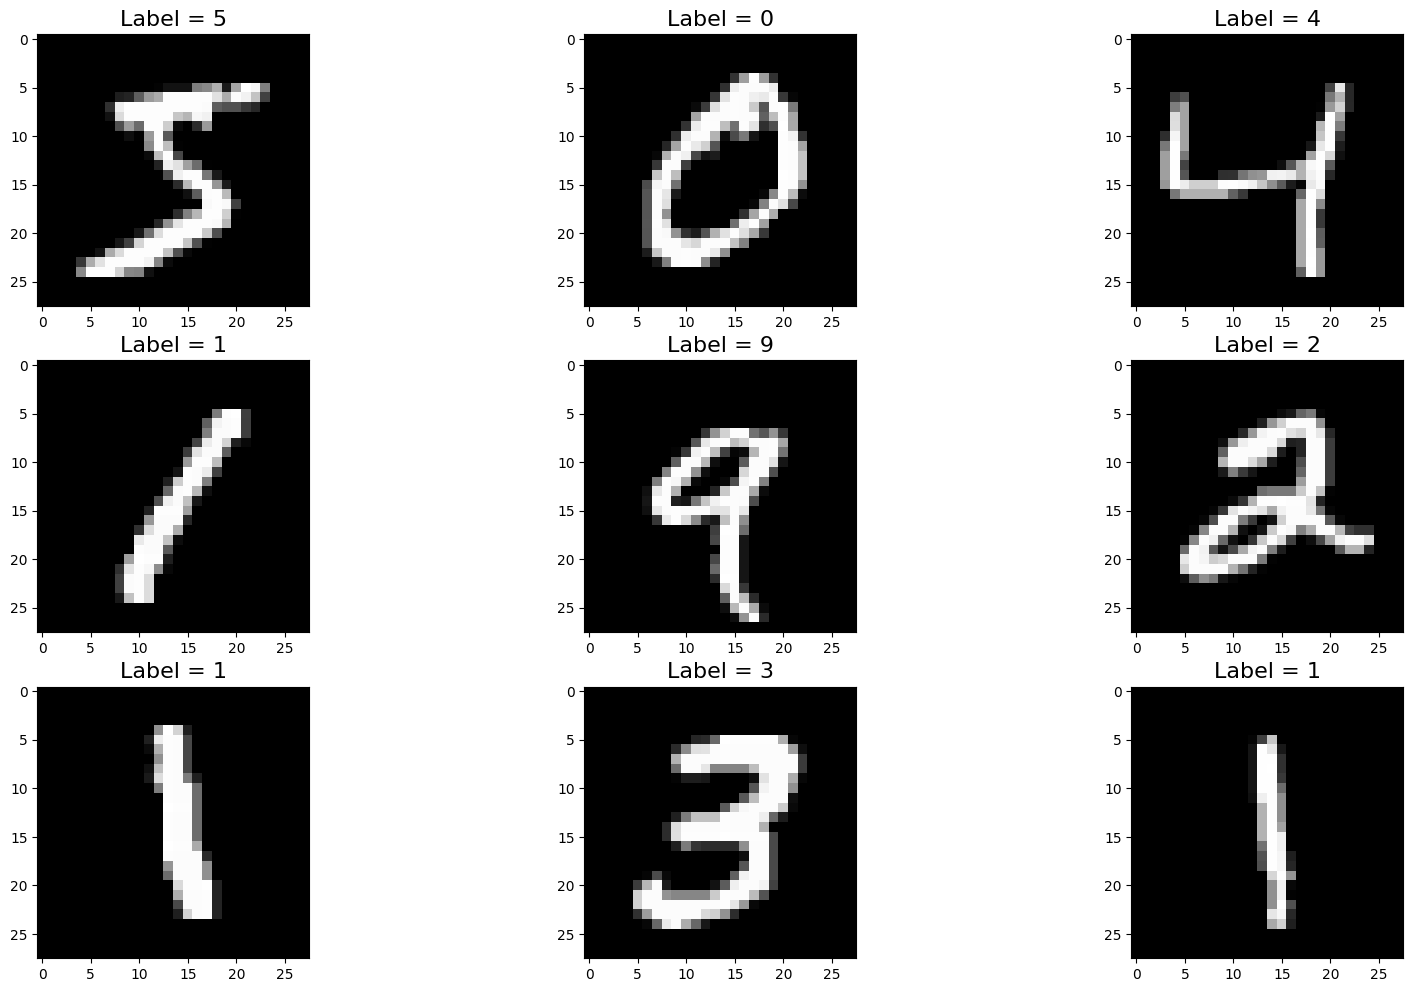

In [3]:
from sklearn.datasets import fetch_openml

# Fetch dataset from openml.org
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, parser="auto")

# Create Train and test sets
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]
print(f"Training test size: {len(y_train)}, Test set size: {len(y_test)}")

# Convert from Pandas to Numpy and scale
X_train = np.array(X_train) / 255
X_test = np.array(X_test) / 255
y_train = np.array(y_train, dtype=np.int8)
y_test = np.array(y_test, dtype=np.int8)

# Display a few images of digits
plt.figure(figsize=(20,12))
for idx, (image, label) in enumerate(zip(X_train[0:9], y_train[0:9])):
    plt.subplot(3, 3, idx+1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title("Label = %s" % label, fontsize=16)

### Train a Multi-Layer Perceptron (MLP) Classifier using scikit-learn

In [4]:
from sklearn.neural_network import MLPClassifier

# Create MLP Classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(40, ), max_iter=12, alpha=1e-3,
                               solver="sgd", verbose=10, random_state=1, learning_rate_init=0.1)

# Train 
mlp_classifier.fit(X_train, y_train)

Iteration 1, loss = 0.32618690
Iteration 2, loss = 0.15949858
Iteration 3, loss = 0.12477276
Iteration 4, loss = 0.10581916
Iteration 5, loss = 0.09185513
Iteration 6, loss = 0.08130242
Iteration 7, loss = 0.07615692
Iteration 8, loss = 0.06773706
Iteration 9, loss = 0.06159657
Iteration 10, loss = 0.05697108
Iteration 11, loss = 0.05291070
Iteration 12, loss = 0.04887255


d:\MyGithub\ML_Scikit-learn_Experiments\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (12) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.001, hidden_layer_sizes=(40,), learning_rate_init=0.1,
              max_iter=12, random_state=1, solver='sgd', verbose=10)

### Evaluate Results

In [5]:
# print accuracy of training and test sets
train_accy = mlp_classifier.score(X_train, y_train)
print("Training set accyracy = ", train_accy)

test_accy = mlp_classifier.score(X_test, y_test)
print("Test set accuracy = ", test_accy)

Training set accyracy =  0.9891833333333333
Test set accuracy =  0.9704


### Run thru some predictions and show results

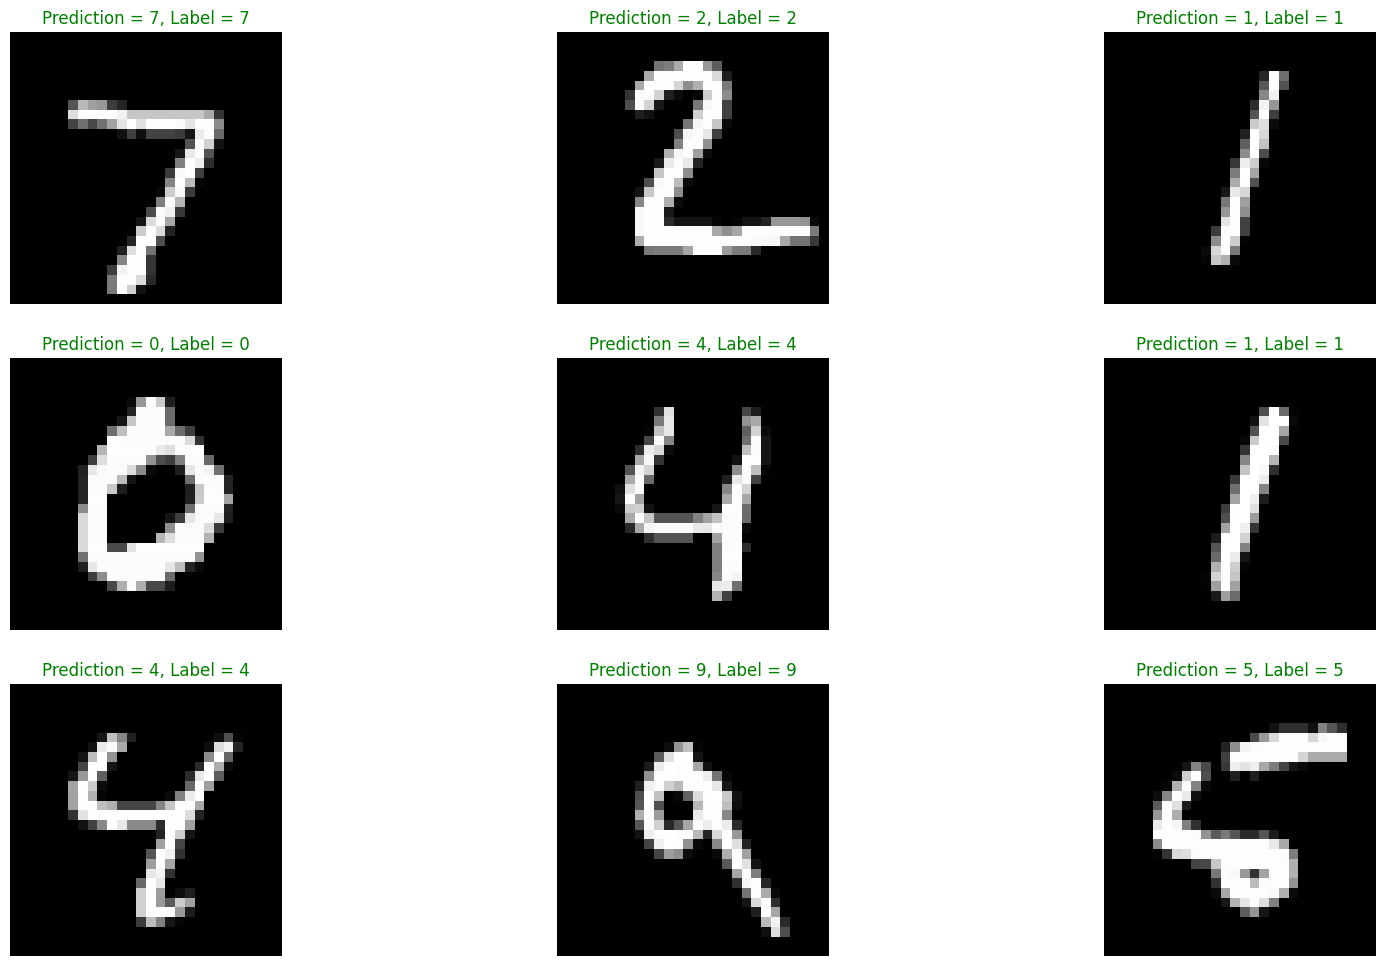

In [6]:
predictions = mlp_classifier.predict(X_test)

# Display a few images with labels and predictions
plt.figure(figsize=(20,12))
for idx, (image, prediction, label) in enumerate(zip(X_test[0:9], predictions[0:9], y_test[0:9])):
    plt.subplot(3, 3, idx+1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    font_color = "g" if prediction == label else "r"
    plt.title("Prediction = %i, Label = %s" % (prediction, label), fontsize=12, color=font_color)
    plt.axis("off")

### Multiclass Confusion Matrix

Iteration 1, loss = 0.39503245
Iteration 2, loss = 0.19552780
Iteration 3, loss = 0.15261320
Iteration 4, loss = 0.12650365
Iteration 5, loss = 0.10907262
Iteration 6, loss = 0.09725960
Iteration 7, loss = 0.08820409
Iteration 8, loss = 0.07845816
Iteration 9, loss = 0.07358213
Iteration 10, loss = 0.06621342
Iteration 11, loss = 0.06066916
Iteration 12, loss = 0.05658200


d:\MyGithub\ML_Scikit-learn_Experiments\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (12) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.38963460
Iteration 2, loss = 0.19403186
Iteration 3, loss = 0.15046478
Iteration 4, loss = 0.12370986
Iteration 5, loss = 0.10748974
Iteration 6, loss = 0.09455774
Iteration 7, loss = 0.08499402
Iteration 8, loss = 0.07699110
Iteration 9, loss = 0.06878331
Iteration 10, loss = 0.06210844
Iteration 11, loss = 0.05618072
Iteration 12, loss = 0.05177368


d:\MyGithub\ML_Scikit-learn_Experiments\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (12) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.39742194
Iteration 2, loss = 0.19221306
Iteration 3, loss = 0.14767648
Iteration 4, loss = 0.12128232
Iteration 5, loss = 0.10503354
Iteration 6, loss = 0.09083081
Iteration 7, loss = 0.08038543
Iteration 8, loss = 0.07238749
Iteration 9, loss = 0.06326248
Iteration 10, loss = 0.05878198
Iteration 11, loss = 0.05130886
Iteration 12, loss = 0.04654411


d:\MyGithub\ML_Scikit-learn_Experiments\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (12) reached and the optimization hasn't converged yet.
  warnings.warn(


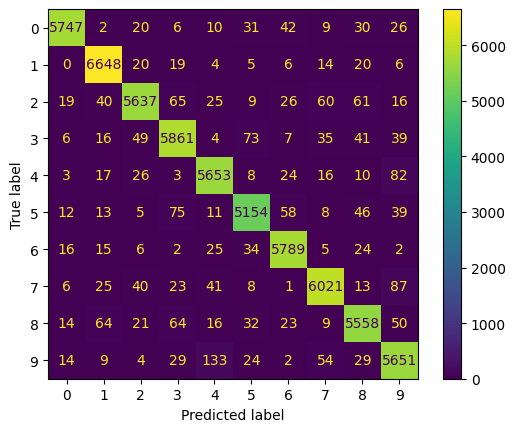

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(mlp_classifier, X_train, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)

Normalized Confusion Matrix by Row

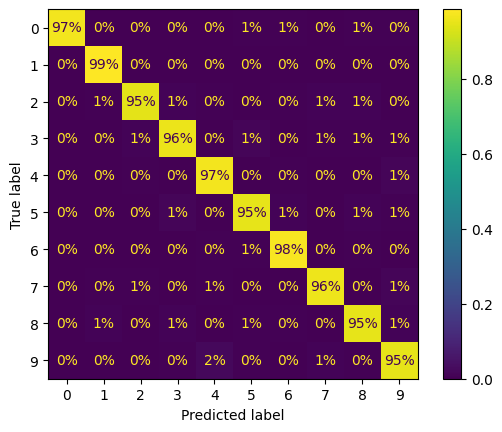

In [9]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format=".0%")

Confusion Matrix with Errors only

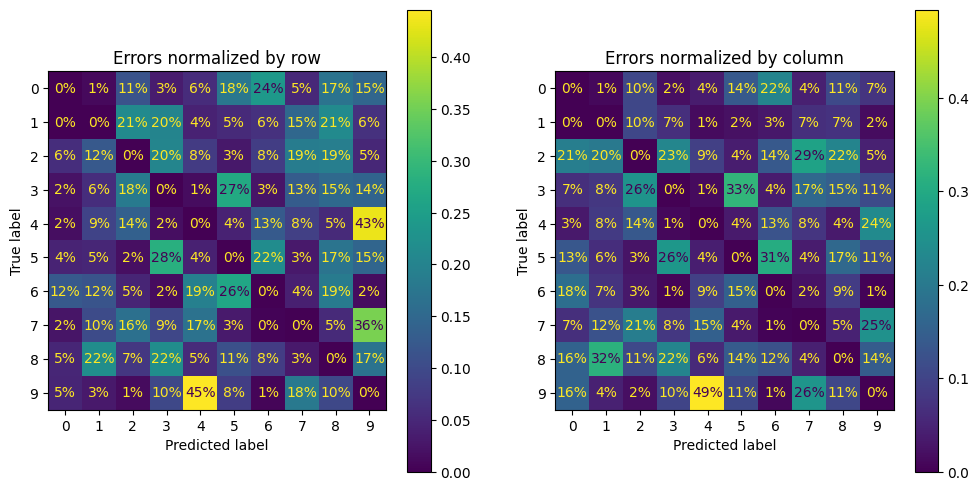

In [16]:
sample_weight = (y_train_pred != y_train)  
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0],
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
axs[0].set_title("Errors normalized by row")
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        sample_weight=sample_weight,
                                        normalize="pred", values_format=".0%")
axs[1].set_title("Errors normalized by column")
plt.show()